In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.2)

In [2]:
df = pd.read_csv('loan_data.csv')
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [17]:
for col in df.columns:
    print(f'For column {col}\n------------------\n')
    print(df[col].value_counts())
    print('\n')

For column credit.policy
------------------

1    7710
0    1868
Name: credit.policy, dtype: int64


For column purpose
------------------

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64


For column int.rate
------------------

0.1253    354
0.0894    299
0.1183    243
0.1218    215
0.0963    210
         ... 
0.1941      1
0.1741      1
0.1620      1
0.1746      1
0.1756      1
Name: int.rate, Length: 249, dtype: int64


For column installment
------------------

317.72    41
316.11    34
319.47    29
381.26    27
662.68    27
          ..
248.43     1
181.57     1
197.18     1
515.46     1
258.68     1
Name: installment, Length: 4788, dtype: int64


For column log.annual.inc
------------------

11.002100    308
10.819778    248
10.596635    224
10.308953    224
10.714418    221
            ... 
9.229358       1
10.3

In [10]:
from datasist.structdata import detect_outliers

In [12]:
checked_cols = ['int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util']

In [18]:
for col in checked_cols:
    outliers_indices = detect_outliers(df, 0, [col])
    print(col,len(outliers_indices))

int.rate 51
installment 236
log.annual.inc 238
dti 0
fico 6
days.with.cr.line 346
revol.bal 780
revol.util 0


<AxesSubplot:xlabel='revol.bal'>

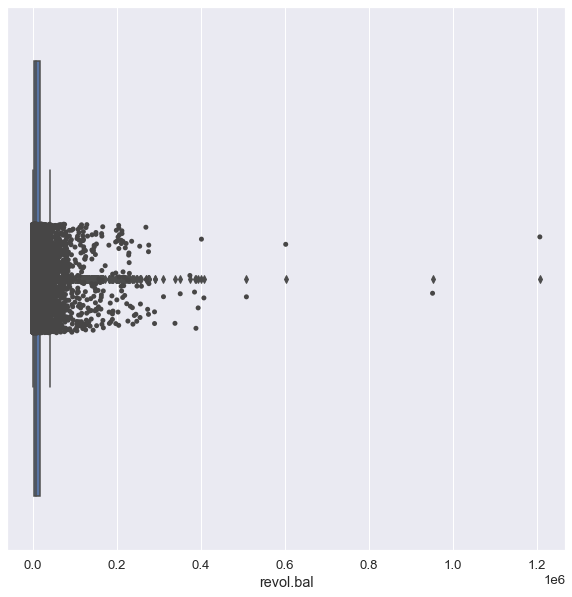

In [22]:
sns.boxplot(x='revol.bal', data=df)
sns.stripplot(x='revol.bal', data=df, color="#474646")

<AxesSubplot:xlabel='installment'>

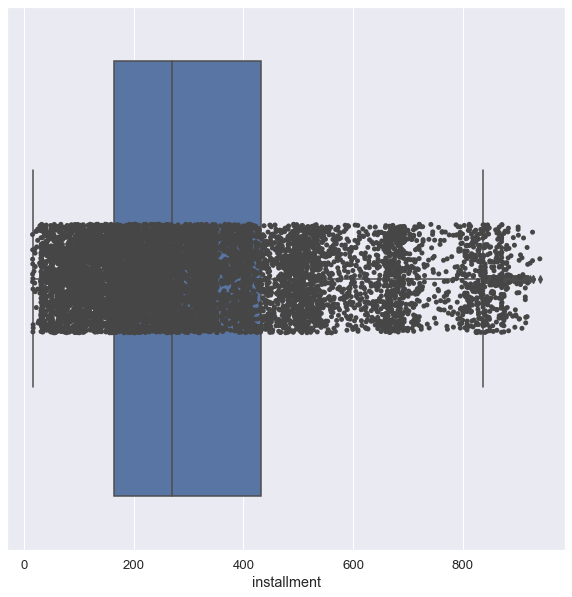

In [23]:
sns.boxplot(x='installment', data=df)
sns.stripplot(x='installment', data=df, color="#474646")

In [24]:
for col in checked_cols:
    outliers_indices = detect_outliers(df, 0, [col])
    col_median = df[col].median()
    df[col].iloc[outliers_indices] = col_median

C:\Users\khaled\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\khaled\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\khaled\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

<AxesSubplot:xlabel='revol.bal'>

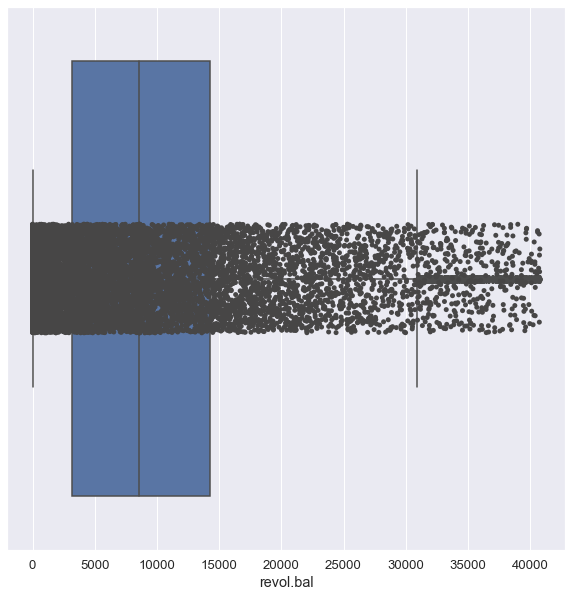

In [25]:
sns.boxplot(x='revol.bal', data=df)
sns.stripplot(x='revol.bal', data=df, color="#474646")

<AxesSubplot:xlabel='installment'>

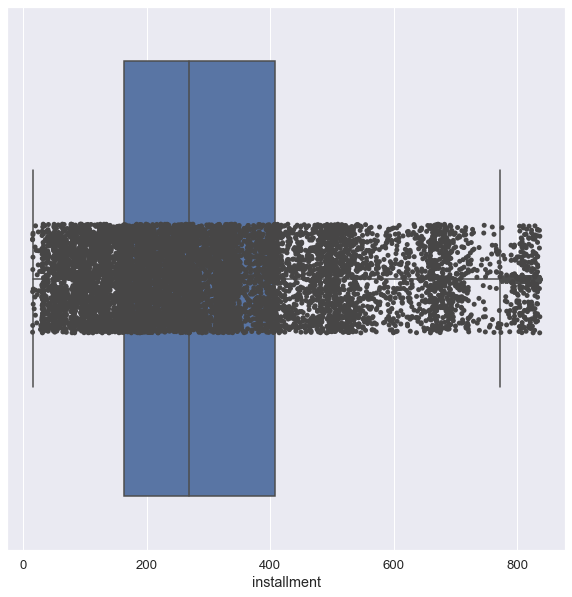

In [26]:
sns.boxplot(x='installment', data=df)
sns.stripplot(x='installment', data=df, color="#474646")

In [28]:
for col in checked_cols:
    outliers_indices = detect_outliers(df, 0, [col])
    print(col,len(outliers_indices))

int.rate 18
installment 221
log.annual.inc 63
dti 0
fico 0
days.with.cr.line 108
revol.bal 388
revol.util 0


In [29]:
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,4139.958333,8596,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [33]:
df = pd.get_dummies(df, columns=['purpose'], drop_first=True)
df

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,4139.958333,8596,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x = df.drop('not.fully.paid', axis=1)
y = df['not.fully.paid']

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=7)

In [38]:
x_train

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
6778,1,0.1183,662.68,12.388394,2.73,737,4800.000000,1260,7.2,0,0,1,0,0,0,0,0,0
6060,1,0.0859,94.84,11.254802,15.92,727,4290.000000,16116,67.7,2,0,0,0,0,0,0,0,0
387,1,0.1172,165.41,11.002100,0.00,672,2520.000000,2126,6.4,1,0,0,0,1,0,0,0,0
4310,1,0.0894,333.61,10.308953,2.84,762,4380.000000,3257,15.1,1,0,0,0,0,0,1,0,0
701,1,0.0945,230.47,10.714418,0.80,717,2730.041667,3332,30.6,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,1,0.0800,313.37,10.274672,2.24,792,4139.958333,2751,16.7,0,0,0,0,0,0,0,0,0
4307,1,0.1600,351.58,11.110166,10.30,662,3059.958333,15735,87.8,1,1,0,0,1,0,0,0,0
5699,1,0.1392,546.20,11.397515,16.51,692,5790.000000,10852,60.9,0,5,0,1,0,0,0,0,0
537,1,0.1324,608.58,11.002100,22.40,687,3151.041667,5855,54.7,0,0,1,0,1,0,0,0,0


In [39]:
x_train.shape

(7662, 18)

In [40]:
x_test

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
2193,1,0.1695,178.14,11.608236,14.95,677,6990.000000,8596,48.3,0,4,0,0,0,0,0,0,0
9151,0,0.1253,368.13,10.896739,11.36,712,7802.958333,11216,20.1,5,0,0,0,1,0,0,0,0
7088,1,0.0788,312.81,10.645425,19.77,737,4500.041667,15664,62.7,2,0,0,1,0,0,0,0,0
6268,1,0.1183,298.21,10.434116,17.12,712,3030.041667,13533,42.3,1,0,0,0,1,0,0,0,0
5230,1,0.0859,158.06,9.903488,10.92,742,4319.958333,5276,50.2,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9227,0,0.1357,169.85,10.621425,18.53,712,4993.958333,2575,7.9,7,0,0,0,0,0,0,0,0
2587,1,0.1316,574.10,10.858922,16.87,732,7799.958333,13429,61.0,0,0,0,0,1,0,0,0,0
4079,1,0.0932,297.11,10.915016,12.15,752,4470.000000,2498,24.7,1,0,0,0,1,0,0,0,0
9008,0,0.1221,65.14,9.903488,2.40,667,540.000000,806,17.1,5,0,0,0,0,0,0,0,1


In [41]:
y_train

6778    1
6060    0
387     0
4310    0
701     1
       ..
919     0
4307    0
5699    0
537     1
9412    0
Name: not.fully.paid, Length: 7662, dtype: int64

In [42]:
y_test

2193    0
9151    0
7088    0
6268    0
5230    0
       ..
9227    0
2587    1
4079    0
9008    0
4795    0
Name: not.fully.paid, Length: 1916, dtype: int64